# Seminar No. 2
In the dataset Household marriage, there are 1346 respondent answers on two questions:

+ ”How important is that the youth do not live in the same household as their
parents?“
+ ”How important is to get married?“  

The answers were on 5 value scale: 

+ Very important(1) 
+ Quite important(2) 
+ To some extent important(3) 
+ Not so important(4) 
+ Absolutely not important(5)

Using suitable descriptional statistics characterize both variables and compare the distribution of the two questions.
*(General Social Survey, USA, 2002)*



In [1]:
# imports
import numpy as np
import pandas as pd
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg

In [2]:
# configs
plt.rcParams['figure.figsize'] = [10, 5]

## 1 Scatter plot
For the Household marriage.RData dataset depict the plot of the **ownhh** and **getmar** variables. 
Since the repeated values of the pairs are located the same, slightly misrepresent their location.

In [3]:
hh_marriage = pd.read_csv("../Data/h_marriage.csv")  # load the data

In [4]:
hh_marriage['ownhh_transpose'] = hh_marriage['ownhh'] + np.random.normal(0, 0.1, hh_marriage.shape[0])  # create the off-centered variables to plot them scattered
hh_marriage['getmar_transform'] = hh_marriage['getmar'] + np.random.normal(0, 0.1, hh_marriage.shape[0])

c:\Users\A200083283\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


The newly created cariables are in the original data set, broad look may be done in the following table

In [5]:
hh_marriage  # show the data frame

,ownhh,getmar,ownhh_transpose,getmar_transform
0,2,4,1.997189,3.779608
1,2,5,2.220202,4.712829
2,3,3,3.011842,2.898153
3,1,3,0.849284,3.001963
4,2,3,1.901093,2.986058
...,...,...,...,...
1341,5,2,4.927336,1.827489
1342,2,4,1.875518,3.897033
1343,2,1,2.193731,1.012361
1344,1,2,0.997585,1.897143


## 1 Scatter plot

Text(0.5, 1.0, 'Scatter plot of the Owning household - Getting married relationship')

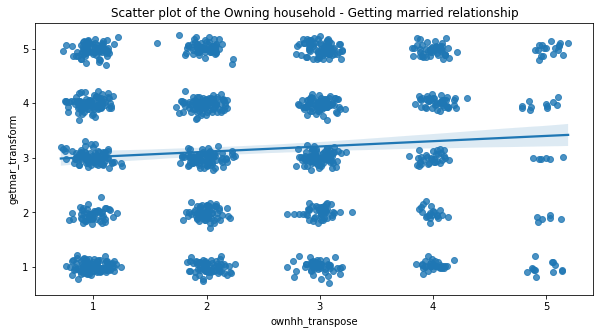

In [80]:
sns.regplot(data=hh_marriage, x="ownhh_transpose", y="getmar_transform")
plt.title("Scatter plot of the Owning household - Getting married relationship")

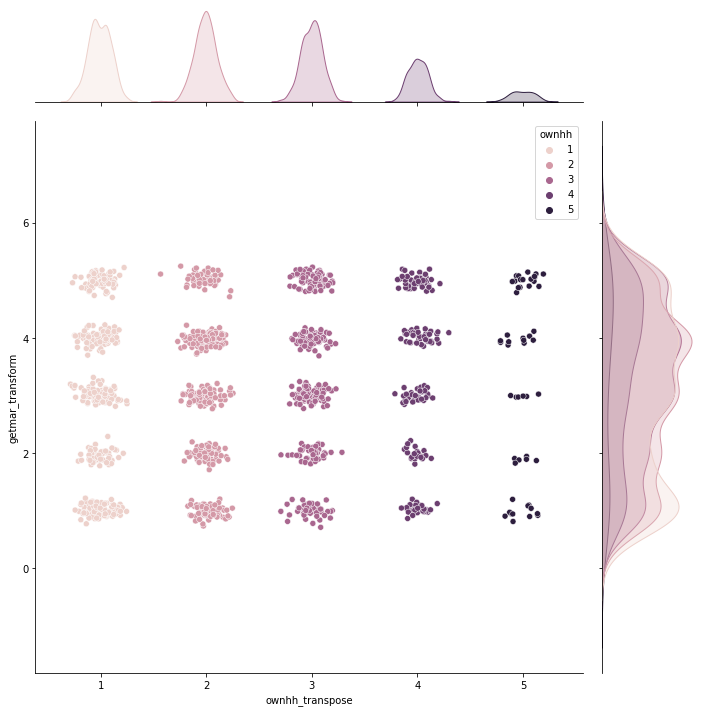

In [183]:
sns.jointplot(data=hh_marriage, x='ownhh_transpose', y='getmar_transform', hue='ownhh', height=10)

## 2 Relationship between our variables

In the Household marriage.RData dataset state and compare the associations between the
variables ”opinion on own household importance”and ”opinion on marriage importance”.
By the Spearman correlation coeficient test the indepence of the two variables. Regarding the value of rS, 
evaluate the significance and practical application relevance of the test.
Compare the p value of this test with the p value of the $\chi^2$ test of independence. What is
the change in the p values related to the data ordinality? 

In [40]:
r_pearson, p_val = stats.pearsonr(hh_marriage['ownhh'], hh_marriage['getmar'])
print(
f"Correlation is {r_pearson} \n"
f"P_value of the zero correlation test is {p_val}"
)


Correlation is 0.08056845733470745 
P_value of the zero correlation test is 0.0030969366051704543


In [41]:
r_spearman, p_val_sp = stats.spearmanr(hh_marriage['ownhh'], hh_marriage['getmar'])
print(
f"Spearman r is {round(r_spearman, 4)} \n"
f"P_value of the zero correlation test is {round(p_val_sp, 4)}"
)

Spearman r is 0.0837 
P_value of the zero correlation test is 0.0021


In [27]:
stats.kruskal(hh_marriage['ownhh'], hh_marriage['getmar'])

KruskalResult(statistic=226.44696652252887, pvalue=3.549978050301059e-51)

In [59]:
chi_stat, p_val, dfree, expected =  stats.chi2_contingency(pd.crosstab(hh_marriage.ownhh, hh_marriage.getmar))

print(f"Chisq = {chi_stat}, p_value = {p_val}, degrees of freedom = {dfree}")

Chisq = 31.74083687802144, p_value = 0.010805401953661937, degrees of freedom = 16


To assess the relationship, we might use the relative frequencies as plotted using heatmap

Text(0.5, 1.0, 'Heatmap of relative frequencies')

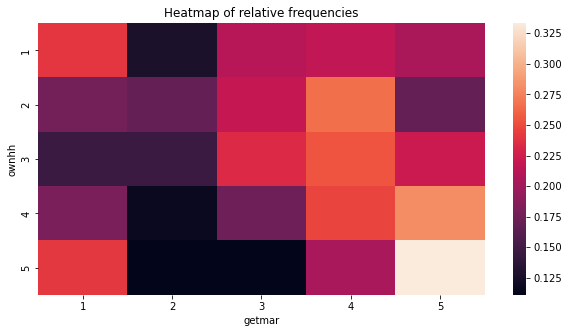

In [46]:
sns.heatmap(pd.crosstab(hh_marriage.ownhh, hh_marriage.getmar, normalize='index'))
plt.title("Heatmap of relative frequencies")

## 3 Show the differences between the opinions

For our purposes, it is useful to create a new variable called *diff* as a plain difference between *ownhh* and *getmar*

In [51]:
hh_marriage['diff'] = hh_marriage['ownhh'] - hh_marriage['getmar']

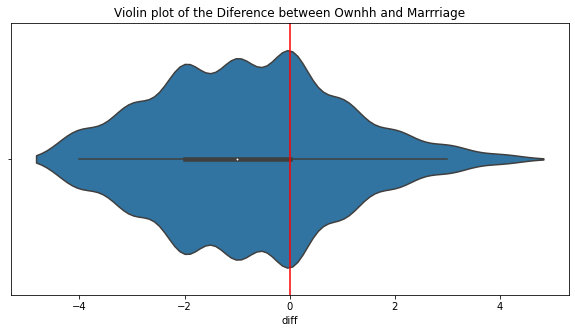

In [52]:
sns.violinplot(x=hh_marriage['diff'])
plt.title("Violin plot of the Diference between Ownhh and Marrriage")
plt.axvline(x=0, color="red")

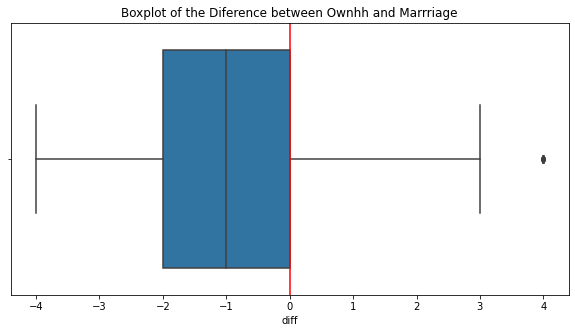

In [68]:
sns.boxplot(x=hh_marriage['diff'])
plt.title("Boxplot of the Diference between Ownhh and Marrriage")
plt.axvline(x=0, color="red")

We may assess that the distribution is slightly positively skewed, and the mean value is below 0


In [57]:
hh_marriage[['diff']].describe()

,diff
count,1346.000000
mean,-0.800892
std,1.742672
min,-4.000000
25%,-2.000000
50%,-1.000000
75%,0.000000
max,4.000000


At first, we conduct the t_test of the zero mean value and subsequently a wilcoxon test

In [77]:
stats.ttest_rel(hh_marriage['ownhh'], hh_marriage['getmar'])

Ttest_relResult(statistic=-16.86089162609198, pvalue=5.152072723524525e-58)

In [79]:
stats.ttest_1samp(hh_marriage['diff'], popmean=0)

Ttest_1sampResult(statistic=-16.86089162609198, pvalue=5.152072723524525e-58)

We may see that results are equivalent

In [59]:
stats.wilcoxon(hh_marriage['ownhh'], hh_marriage['getmar'])

WilcoxonResult(statistic=125911.0, pvalue=4.028596298277015e-53)

In [65]:
hh_marriage[['ownhh', 'getmar']].corr().apply(lambda x: round(x, 3))

,ownhh,getmar
ownhh,1.000,0.081
getmar,0.081,1.000


## 4 Crime dataset

In [177]:
crime = pd.read_csv("../Data/criminality.csv")
crime['state']= crime['state'].astype("str")
crime.columns = crime.columns.str.replace(".", "_")

C:\Users\A20008~1\AppData\Local\Temp/ipykernel_21960/2132531615.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  crime.columns = crime.columns.str.replace(".", "_")


In [178]:
crime = crime.set_index(['state'])

In [173]:
crime.dtypes

violence             int64
murders            float64
big_city           float64
white_men          float64
high_school        float64
poverty            float64
broken_families    float64
dtype: object

In [106]:
crime

,violence,murders,big.city,white.men,high.school,poverty,broken.families
state,,,,,,,
101,761,9.0,41.8,75.2,state 101 46.210648 102 -51.429389 ...,9.1,14.3
102,780,11.6,67.4,73.5,state 101 35.698526 102 -39.730094 ...,17.4,11.5
103,593,10.2,44.7,82.9,state 101 35.378359 102 -39.373770 ...,20.0,10.7
104,715,8.6,84.7,88.6,state 101 41.995127 102 -46.737794 ...,15.4,12.1
105,1078,13.1,96.7,79.3,state 101 40.661101 102 -45.253112 ...,18.2,12.5
106,567,5.8,81.8,92.5,state 101 45.036705 102 -50.122869 ...,9.9,12.1
107,456,6.3,95.7,89.0,state 101 42.261932 102 -47.034730 ...,8.5,10.1
108,686,5.0,82.7,79.4,state 101 41.354794 102 -46.025146 ...,10.2,11.4
109,1206,8.9,93.0,83.5,state 101 39.700603 102 -44.184141 ...,17.8,10.6


To assess relationships between pairs of variables, we might use the pairplot. On the diagonal axis are histograms while non-diagonal plots are shown as scatterplots

Text(0.5, 0.98, 'Pair plots of Crime data variables')

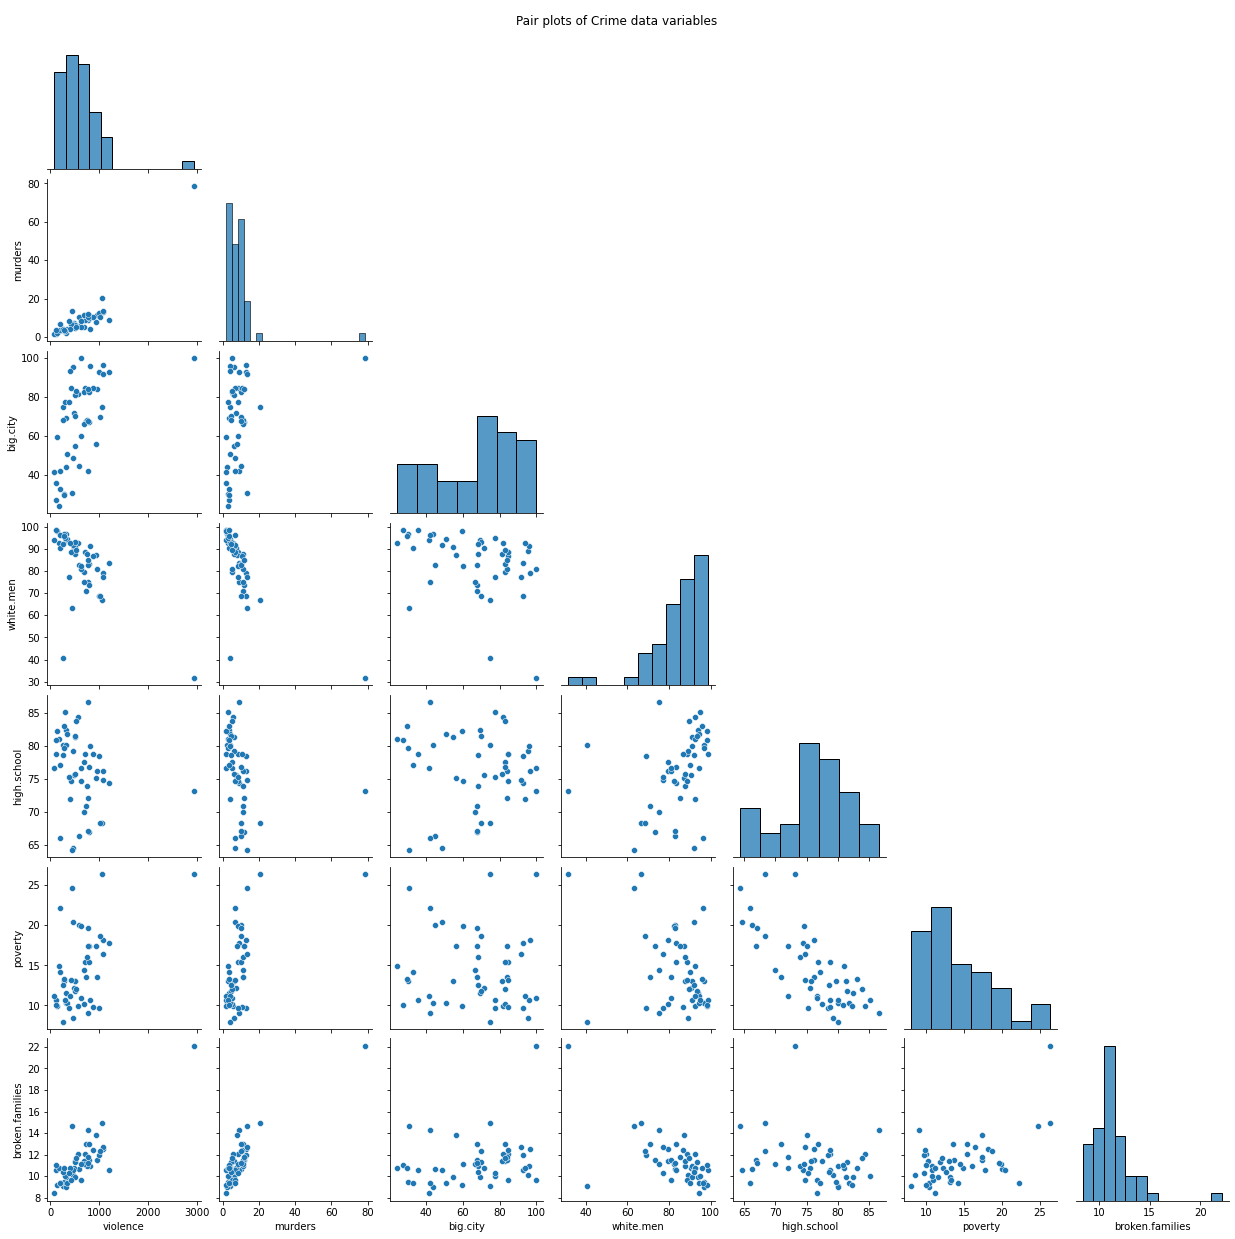

In [93]:
crime_pairs = sns.pairplot(crime, corner=True)
crime_pairs.fig.suptitle(("Pair plots of Crime data variables"))

It might also be useful to visualize the correlations using heatmaps

<AxesSubplot:>

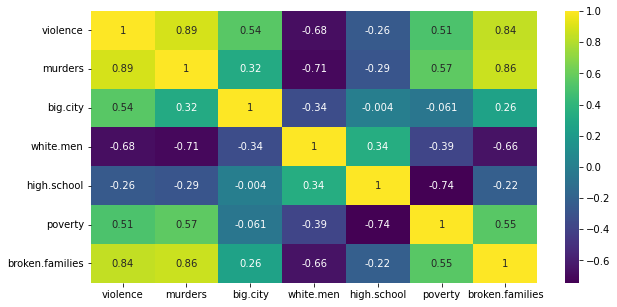

In [75]:
sns.heatmap(crime.corr(), annot=True, cmap="viridis")

In [61]:
crime.cov()

,violence,murders,big.city,white.men,high.school,poverty,broken.families
violence,194569.494902,4189.516392,5269.178431,-3959.434745,-631.596235,1030.281412,785.012078
murders,4189.516392,114.866431,74.390275,-100.315420,-17.145259,27.802353,19.529286
big.city,5269.178431,74.390275,482.115702,-98.191322,-0.488365,-6.093612,12.102455
white.men,-3959.434745,-100.315420,-98.191322,175.636337,25.058412,-23.641471,-18.463804
high.school,-631.596235,-17.145259,-0.488365,25.058412,31.271435,-19.071212,-2.607412
poverty,1030.281412,27.802353,-6.093612,-23.641471,-19.071212,21.015271,5.335271
broken.families,785.012078,19.529286,12.102455,-18.463804,-2.607412,5.335271,4.500737


In [62]:
crime.corr()

,violence,murders,big.city,white.men,high.school,poverty,broken.families
violence,1.000000,0.886196,0.544039,-0.677312,-0.256052,0.509508,0.838875
murders,0.886196,1.000000,0.316114,-0.706259,-0.286071,0.565871,0.858911
big.city,0.544039,0.316114,1.000000,-0.337435,-0.003977,-0.060538,0.259810
white.men,-0.677312,-0.706259,-0.337435,1.000000,0.338121,-0.389135,-0.656708
high.school,-0.256052,-0.286071,-0.003977,0.338121,1.000000,-0.743938,-0.219783
poverty,0.509508,0.565871,-0.060538,-0.389135,-0.743938,1.000000,0.548589
broken.families,0.838875,0.858911,0.259810,-0.656708,-0.219783,0.548589,1.000000


# 6 Countries dataset

Homework: The same tasks as in the problem 4 for the Countries dataset.

In [79]:
country_data = pd.read_csv("../Data/countries.csv")

In [83]:
country_data.describe()

,Agricul,Mining,Manufact.indust,Energ,Build.ind,Services,Finance,Soc.services
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000


In [84]:
country_data

,Agricul,Mining,Manufact.indust,Energ,Build.ind,Services,Finance,Soc.services
0,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6
1,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2
2,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6
3,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3
4,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8
5,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1
6,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2
7,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5
8,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3
9,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8


<AxesSubplot:>

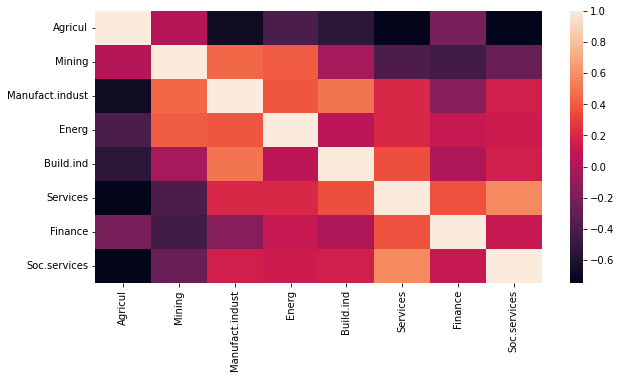

In [81]:
sns.heatmap(country_data.corr())

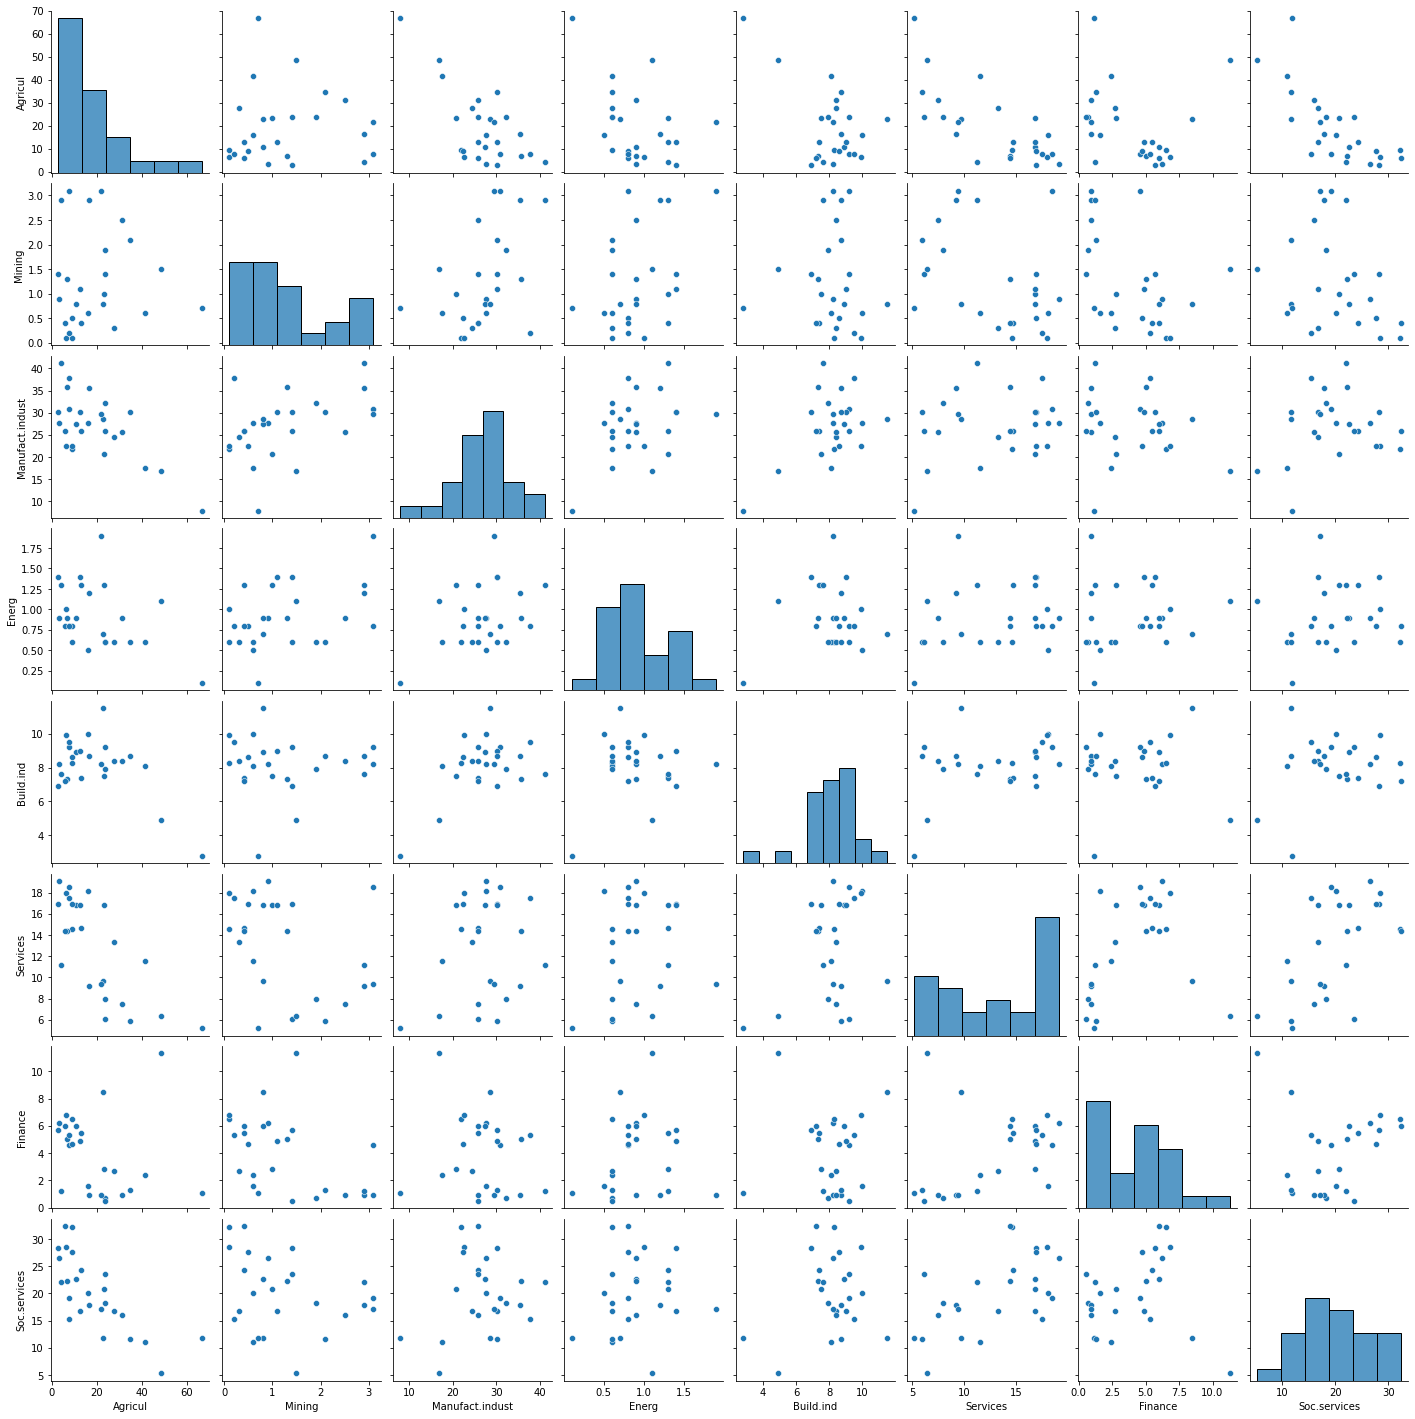

In [82]:
sns.pairplot(country_data)